<a href="https://colab.research.google.com/github/eduardocarbo/NewRepo/blob/master/PROYECTO__ATDM_JobBank__3_Inferencia_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prueba de hipótesis para la media (caso σ desconocida)

#Exploracion de los Datos

In [144]:
from google.colab import files
uploaded=files.upload()

Saving JobBank_Final.csv to JobBank_Final.csv


In [145]:
# Import pandas
import pandas as pd
df=pd.read_csv("JobBank_Final.csv")
df.head()

,Unnamed: 0,titulo,NOC,fecha_post,compania,locacion,salario,tipo_contrato,vacantes,JobBank_id,...,Poblacion,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo,TEER_Category,Class_title,Occupation_types,tiene_experiencia
0,0,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17.0,Full time,1.0,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",...,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,Occupations that usually require,Si
1,1,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17.0,Full time,1.0,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",...,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,"a high school diploma, or",Si
2,2,tire technician,NOC 74203,"April 29, 2023",TIRE PIRATES INC\n,AB,17.0,Full time,1.0,"\nLocation104 61 AVE SECalgary, ABT2R 0R2\n",...,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,several weeks of on-the-job training,Si
3,3,automotive window tint installer,NOC 74203,"April 03, 2023",Ultimate Auto Protection Inc.,AB,18.0,Full time,1.0,"\nLocationCalgary, AB\n",...,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,Occupations that usually require,No
4,4,automotive window tint installer,NOC 74203,"April 03, 2023",Ultimate Auto Protection Inc.,AB,18.0,Full time,1.0,"\nLocationCalgary, AB\n",...,4067175,0.12,6.4,14.0,0.073,610000,4,Automotive and heavy truck and equipment parts...,"a high school diploma, or",No


In [146]:
df.shape

(1574, 26)

In [147]:
df.describe()

,Unnamed: 0,salario,vacantes,experiencia,Poblacion,% aproximado de la poblacion nacional,Densidad de poblacion (hab - hm2),Salario Min,Desempleo %,Puestos de trabajo,TEER_Category
count,1574.000000,1559.000000,1574.0,1574.000000,1.574000e+03,1574.000000,1574.000000,1574.000000,1574.000000,1.574000e+03,1574.000000
mean,786.500000,27.314407,1.0,0.500635,8.553917e+06,0.211931,9.008348,14.266709,0.037284,4.492630e+05,2.688691
std,454.518977,15.139522,0.0,1.243291,6.333338e+06,0.137646,5.354682,1.174294,0.026770,3.765611e+05,1.271093
min,0.000000,13.000000,1.0,0.000000,3.587400e+04,0.020000,0.080000,12.000000,0.004000,1.000000e+05,0.000000
25%,393.250000,17.000000,1.0,0.000000,4.067175e+06,0.120000,5.000000,13.000000,0.004000,1.000000e+05,2.000000
50%,786.500000,21.000000,1.0,0.000000,5.000879e+06,0.130000,6.400000,15.000000,0.050000,4.500000e+05,2.000000
75%,1179.750000,32.000000,1.0,0.000000,1.671123e+07,0.380000,14.800000,15.000000,0.053000,6.100000e+05,4.000000
max,1573.000000,95.000000,1.0,7.000000,1.671123e+07,0.410000,25.100000,18.000000,0.078000,2.185000e+06,5.000000


In [148]:
df.columns

Index(['Unnamed: 0', 'titulo', 'NOC', 'fecha_post', 'compania', 'locacion',
       'salario', 'tipo_contrato', 'vacantes', 'JobBank_id', 'idioma',
       'educacion', 'experiencia', 'responsabilidades', 'links_secciones',
       'Provincia - Territorio', 'Poblacion',
       '% aproximado de la poblacion nacional',
       'Densidad de poblacion (hab - hm2)', 'Salario Min', 'Desempleo %',
       'Puestos de trabajo', 'TEER_Category', 'Class_title',
       'Occupation_types', 'tiene_experiencia'],
      dtype='object')

#Prueba de Hipótesis


In [149]:
import numpy as np 
import pandas as pd
datos = df


	H1: Existe relación exponencial entre el salario y los años de experiencia.

Para esto planteamos los 2 tipos de hipótesis:

H0: SI existe una relación entre el salario y los años de experiencia en el medio laboral canadiense.

Ha: NO Existe una relación entre el salario y los años de experiencia en el medio laboral canadiense.

NOTA: Se utilizará la forma de sigma no conocido con cálculo de prueba en 2 colas.

#Condiciones


Independencia

Se trata de un muestreo aleatorio por medio de web-scraping cogiendo los últimos 1000 trabajos posteados en JobBank. Se puede afirmar que los eventos son independientes.

#Normalidad : número de observaciones por grupo

In [150]:
#Se dentermina cuantos trabajos piden experiencia y cuantos no:
datos.groupby('tiene_experiencia').size()

tiene_experiencia
No    1190
Si     384
dtype: int64

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [152]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='salario', group='tiene_experiencia')

,W,pval,normal
tiene_experiencia,,,
Si,0.892733,1.119581e-15,False
No,0.776690,2.668133e-37,False


test Shapiro-Wilk encuentran evidencias significativas de que los datos no proceden de poblaciones con distribución normal. Sin embargo, dado que el tamaño de cada grupo es mayor que 30 se puede considerar que el t-test sigue siendo suficientemente robusto

#Igualdad de varianza (homocedasticidad)

Existen varios test que permiten comparar varianzas. Dado que no se cumple el criterio de normalidad, uno de los recomendados es el test de Leven.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


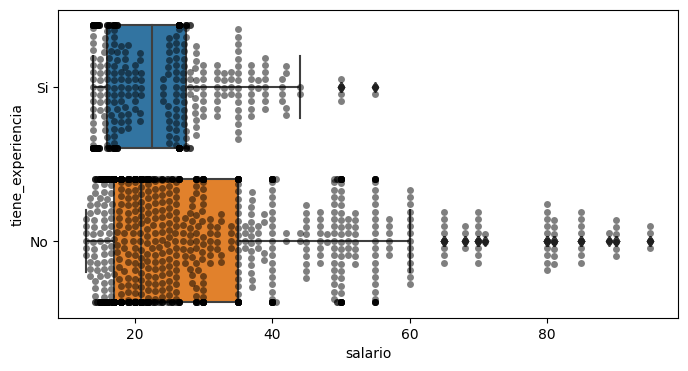

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="tiene_experiencia", x="salario", data=df, ax=ax)
sns.swarmplot(y="tiene_experiencia", x="salario", data=df, color='black', alpha = 0.5, ax=ax);

In [154]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='salario', group='tiene_experiencia')

,W,pval,equal_var
levene,NaN,NaN,False


No se encuentran evidencias significativas (para alpha = 0.05) de que las varianzas sean distintas entre ambas poblaciones. Si lo fuesen, se tendría que realizar el t-test con la corrección de Welch.

#T-Test
La función ttest de paquete Pingouin calcula el p-value, intervalos de confianza y tamaño de efecto

In [155]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
peso_smokers = datos.loc[datos.tiene_experiencia == 'Si', 'salario']
peso_nonsmokers = datos.loc[datos.tiene_experiencia == 'No', 'salario']

pg.ttest(x=peso_smokers, y=peso_nonsmokers, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.739199,1557,two-sided,1.141275e-08,"[-6.81, -3.34]",0.338552,6.537e+05,0.99992


Conclusión¶


Dado que p-value (0.565198) es mayor que el nivel de significancia alpha (0.05) , se dispone de evidencia suficiente para considerar que existe SI existe una relación entre el salario y los años de experiencia en el medio laboral canadiense. El tamaño de efecto medido por d-Cohen es pequeño (0.08)

	H2:  Los inmigrantes con estudios canadiense consiguen fácilmente trabajo.

Para esto planteamos los 2 tipos de hipótesis:

H0: Los inmigrantes con estudios canadiense consiguen SI fácilmente trabajo.

Ha: Los inmigrantes con estudios canadiense consiguen NO fácilmente trabajo.

NNOTA: Se utilizará la forma de sigma no conocido con cálculo de prueba en 2 colas.


Normalidad : número de observaciones por grupo

In [159]:
#Se dentermina cuantos trabajos piden experiencia y cuantos no:
df.groupby('educacion').size()

educacion
Bachelor's      1172
College           58
Secondary        270
postgraduate      12
professional      62
dtype: int64

In [160]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='salario', group='educacion')

,W,pval,normal
educacion,,,
professional,0.773137,2.103222e-08,False
Bachelor's,0.782867,1.262987e-36,False
Secondary,0.872007,3.129289e-14,False
College,0.695786,1.135811e-09,False
postgraduate,0.810788,1.245916e-02,False


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


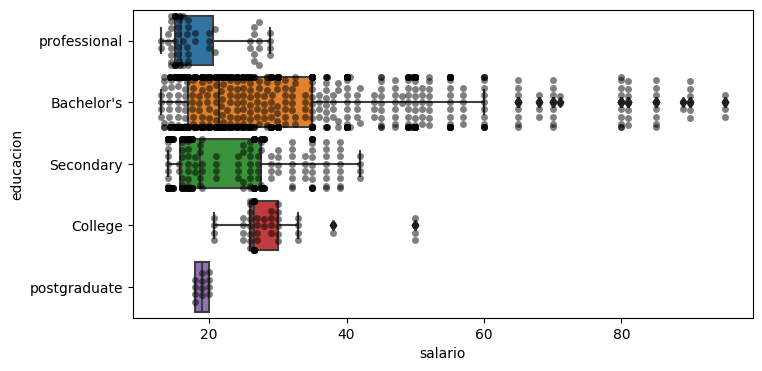

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="educacion", x="salario", data=df, ax=ax)
sns.swarmplot(y="educacion", x="salario", data=df, color='black', alpha = 0.5, ax=ax);

In [163]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='salario', group='educacion')

,W,pval,equal_var
levene,NaN,NaN,False


In [164]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
peso_smokers = datos.loc[datos.educacion == 'professional', 'salario']
peso_nonsmokers = datos.loc[datos.educacion == "Bachelor's", 'salario']
peso_nonsmokers = datos.loc[datos.educacion == 'Secondary', 'salario']
peso_nonsmokers = datos.loc[datos.educacion == 'College', 'salario']
peso_nonsmokers = datos.loc[datos.educacion == 'postgraduate', 'salario']

pg.ttest(x=peso_smokers, y=peso_nonsmokers, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.320668,72,two-sided,0.749391,"[-3.42, 2.47]",0.101131,0.321,0.061546


	H3:  Para obtener un puesto prevalece más la experiencia y el conocimiento que el requisito de tener un estudio canadiense en una institución canadiense.

Para esto planteamos los 2 tipos de hipótesis:

H0: Para obtener un puesto SI prevalece más la experiencia y el conocimiento que el requisito de tener un estudio canadiense en una institución canadiense.

Ha: Para obtener un puesto NO prevalece más la experiencia y el conocimiento que el requisito de tener un estudio canadiense en una institución canadiense.

NOTA: Se utilizará la forma de sigma no conocido con cálculo de 2 colas.

In [165]:
#Se dentermina cuantos trabajos piden experiencia y cuantos no:
df.groupby('educacion').size()

educacion
Bachelor's      1172
College           58
Secondary        270
postgraduate      12
professional      62
dtype: int64

In [166]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='experiencia', group='educacion')

,W,pval,normal
educacion,,,
professional,0.608390,1.360743e-11,False
Bachelor's,0.084806,0.000000e+00,False
Secondary,0.536838,4.048141e-26,False
College,0.639305,1.123449e-10,False
postgraduate,0.608091,1.253959e-04,False


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 98.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be place

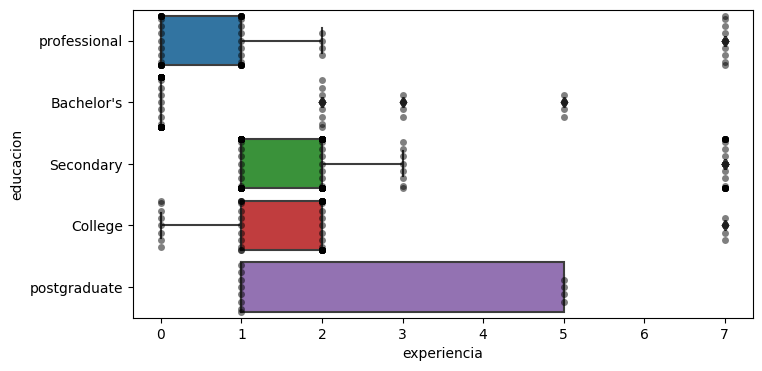

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="educacion", x="experiencia", data=df, ax=ax)
sns.swarmplot(y="educacion", x="experiencia", data=df, color='black', alpha = 0.5, ax=ax);

In [169]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='experiencia', group='educacion')

,W,pval,equal_var
levene,80.305131,4.680503e-62,False


In [170]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
peso_smokers = datos.loc[datos.educacion == 'professional', 'experiencia']
peso_nonsmokers = datos.loc[datos.educacion == "Bachelor's", 'experiencia']
peso_nonsmokers = datos.loc[datos.educacion == 'Secondary', 'experiencia']
peso_nonsmokers = datos.loc[datos.educacion == 'College', 'experiencia']
peso_nonsmokers = datos.loc[datos.educacion == 'postgraduate', 'experiencia']

pg.ttest(x=peso_smokers, y=peso_nonsmokers, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.12769,72,two-sided,0.263195,"[-2.26, 0.63]",0.355647,0.509,0.199481


	H4:  Los sueldos promedio para un trabajador con trabajos “entry-level” están en promedio CA$36000 al año.

Para esto planteamos los 2 tipos de hipótesis:

H0: Los sueldos promedio para un trabajador con trabajos “entry-level” SI están en promedio CA$36000 al año.

Ha: Los sueldos promedio para un trabajador con trabajos “entry-level” NO están en promedio CA$36000 al año.

NOTA: Se utilizará la forma de sigma no conocido con cálculo de prueba en 2 colas.